In [1]:
import sympy  as sp
from sympy import *
import numpy as np
#Para resolver sistemas de ecuaciones diferencials 
from sympy.solvers.ode.systems import dsolve_system
from IPython.display import display, Math
from libreria_geometria import componentes_tensor_riemann, componentes_tensor_curvatura, componentes_tensor_ricci, curvatura_escalar

In [2]:
sp.interactive.printing.init_printing(use_latex=True)

In [3]:
#Declaración de las variables que vamos a usar
t, r, theta, phi, M= sp.symbols('t r theta phi  M')
#Esto aunque son variables vamos a ponerlas como variables para que sea mas elegante
G, c = sp.symbols("G c")
r_s = sp.symbols("r_s")
#Vector con las variables que vamos a usar 
variables = [t,r,theta,phi]

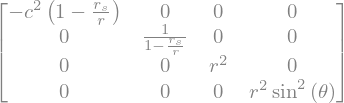

In [4]:
#Expreso la métrica en forma matricial 
g = sp.Matrix([[-c**2*((1-r_s/r)),0,0,0],
    [0,((1-r_s/r))**-1,0,0],
     [0,0,r**2,0],
     [0,0,0,r**2*sp.sin(theta)**2]])
g

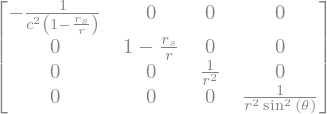

In [5]:
#Esto es para poder hacerlo en python y no en sympy que es horrible
g =[[-c**2*((1-r_s/r)),0,0,0],
    [0,((1-r_s/r))**-1,0,0],
     [0,0,r**2,0],
     [0,0,0,r**2*sp.sin(theta)**2]]
#SOLO SIRVE PARA MATRICES DIAGONALES 
g_inv = [[i for i in v] for v in g]
for i in range(len(g_inv)):
    for j in range(len(g_inv)):
        if g_inv[i][j]!= 0:
            g_inv[i][i]= g_inv[i][i]**-1
#Para ver bonita la matriz inversa 
g_inv_sp  = Matrix(g_inv)
g_inv_sp
#g= sp.Matrix(g) 

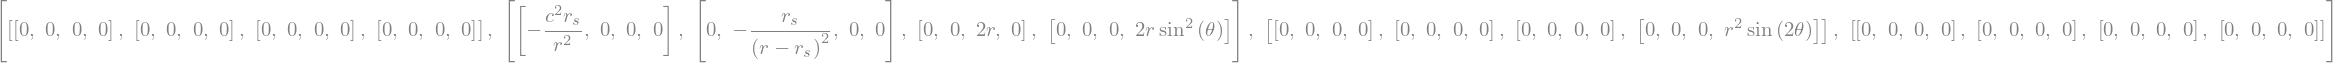

In [6]:
#Este vector va a contener la matriz g derivada respecto de cada la variable
#Por ejemplo derivadas_variable[0] es la derivada de toda la matriz respecto de t
#            derivadas_variable[1] es la derivada de toda la matriz respecto de x
#Y derivadas_variable[1][0][0] es la derivad parcial de g_{0,0} respecto x
# y así sucesivamente 
derivadas_variable = []

for variable in variables: 
    derivada_variable = [[0 for i in variables] for j in variables]
    for i in range(len(variables)):
        for j in range(len(variables)): 
            funcion = g[i][j]
            #Para no hacer la derivada de un número 
            if type(funcion) == sp.core.mul.Mul or type(funcion) == sp.core.power.Pow: 
                derivada_variable[i][j] = simplify(funcion.diff(variable))
                
    derivadas_variable.append(derivada_variable)
derivadas_variable

In [7]:


#Esta matriz va a tener los simbolos de chistoffle 
#Por ejemplo, simbolo_chirtoffle[2][0][1] sería \gamma^y_{t,x}
simbolos_chistoffle = [[[0 for j in variables] for i in variables] for m in variables]


for m in range(len(variables)):
    for i in range(len(variables)):
        for j in range(len(variables)):
            simbolo = 0
            #El sumatorio respecto del indice libre l 
            for l in range(len(variables)):
                #Para evitar hacer una multiplicación por 0 
                if  g_inv[m][l] != 0: 
                    simbolo =simbolo + g_inv[m][l]*(derivadas_variable[j][i][l]+derivadas_variable[i][j][l]-derivadas_variable[l][i][j])
            #Aquí multiplico  por el 1/2 que hemos sacado de factor común 
            simbolo =1/2*simbolo
            simbolos_chistoffle[m][i][j] = simplify(simbolo)
for i in range(len(simbolos_chistoffle)):
    for j in range(len(simbolos_chistoffle)):
        for k in range(len(simbolos_chistoffle)):
            if simbolos_chistoffle[i][j][k] != 0:
                
                display(Math(f'\Gamma^{{{variables[i]}}}_{{{variables[j]},{variables[k]}}} = ' +latex(simbolos_chistoffle[i][j][k])))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [8]:
#Variable para poder derivar 
tau = sp.symbols("tau")

#Defino las derivadas, esto para poder resolverlo 
dt = sp.Function('dt')(tau)
dr = sp.Function("dr")(tau)
dtheta = sp.Function('dtheta')(tau) 
dphi =  sp.Function('dphi')(tau)


#Quitamos dz
variables_derivadas = [dt,dr,dtheta,dphi]


In [9]:
#Esto va a con
geodesicas = [i.diff(tau) for i in variables_derivadas]

for variable in range(len(variables)): 
    for i in range(len(variables)):
        for j in range(len(variables)):
            geodesicas[variable] = geodesicas[variable] +simplify( simbolos_chistoffle[variable][i][j]*variables_derivadas[i]*variables_derivadas[j])
    geodesicas[variable] = sp.Eq(geodesicas[variable],0)


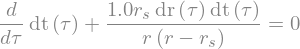

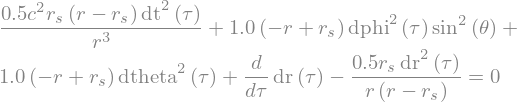

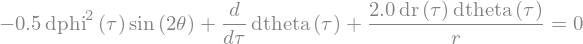

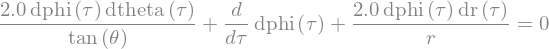

In [10]:
for v in geodesicas: 
    display(v)

In [12]:




t = sp.Function('t')(tau)
x = sp.Function('x')(tau)
y = sp.Function('y')(tau)

In [13]:
u_0 =  sp.Function('u_0')(tau)
u_1 = sp.Function("u_1")(tau)
u_2 = sp.Function("u_2")(tau)

In [14]:
M,c = sp.symbols("M, c")
rho_s =  sp.Function('rho_s')(M)
rho_s

rho_s(M)

In [15]:
rho=sp.sqrt(x**2+y**2)
rho

sqrt(x(tau)**2 + y(tau)**2)

In [16]:
dt = sp.Eq(t.diff(),u_0)
dt

Eq(Derivative(t(tau), tau), u_0(tau))

In [17]:
dx = sp.Eq(x.diff(),u_1)
dx

Eq(Derivative(x(tau), tau), u_1(tau))

In [18]:
dy = sp.Eq(y.diff(),u_2)
dy

Eq(Derivative(y(tau), tau), u_2(tau))

In [19]:
du_0 = sp.Eq(u_0.diff(),-4*rho_s*u_0/(rho*(rho**2-rho_s**2))*(u_1*x+y*u_2))
du_0

Eq(Derivative(u_0(tau), tau), -4*(u_1(tau)*x(tau) + u_2(tau)*y(tau))*rho_s(M)*u_0(tau)/(sqrt(x(tau)**2 + y(tau)**2)*(-rho_s(M)**2 + x(tau)**2 + y(tau)**2)))

In [20]:
du_1 = sp.Eq(u_1.diff(tau),-2*c**2*(rho-rho_s)*rho**(3/2)*rho_s*x*u_0**2/(rho_s+rho)**7-2*rho_s/((rho_s+rho)*rho**2)*(x*(u_2**2-u_1**2)-2*y*u_1*u_2) )
du_1

Eq(Derivative(u_1(tau), tau), -2*c**2*(sqrt(x(tau)**2 + y(tau)**2) - rho_s(M))*(x(tau)**2 + y(tau)**2)**0.75*rho_s(M)*u_0(tau)**2*x(tau)/(sqrt(x(tau)**2 + y(tau)**2) + rho_s(M))**7 - 2*((-u_1(tau)**2 + u_2(tau)**2)*x(tau) - 2*u_1(tau)*u_2(tau)*y(tau))*rho_s(M)/((sqrt(x(tau)**2 + y(tau)**2) + rho_s(M))*(x(tau)**2 + y(tau)**2)))

In [21]:
du_2 = sp.Eq(u_2.diff(tau),-2*c**2*(rho-rho_s)*rho**(3/2)*rho_s*y*u_0**2/(rho_s+rho)**7-2*rho_s/((rho_s+rho)*rho**2)*(y*(-u_2**2+u_1**2)-2*x*u_1*u_2) )
du_2

Eq(Derivative(u_2(tau), tau), -2*c**2*(sqrt(x(tau)**2 + y(tau)**2) - rho_s(M))*(x(tau)**2 + y(tau)**2)**0.75*rho_s(M)*u_0(tau)**2*y(tau)/(sqrt(x(tau)**2 + y(tau)**2) + rho_s(M))**7 - 2*((u_1(tau)**2 - u_2(tau)**2)*y(tau) - 2*u_1(tau)*u_2(tau)*x(tau))*rho_s(M)/((sqrt(x(tau)**2 + y(tau)**2) + rho_s(M))*(x(tau)**2 + y(tau)**2)))

In [36]:
!export PATH=/Library/TeX/texbin:$PATH

In [25]:
dsolve_system([dt,dx,dy,du_0,du_1,du_2])

NotImplementedError: 
The system of ODEs passed cannot be solved by dsolve_system.

### Tensor curvatura de Riemann

In [10]:
R = componentes_tensor_riemann(g, variables)

In [11]:
for l in range(len(variables)):
    for i in range(len(variables)):
        for j in range(len(variables)):
            for k in range(len(variables)):
                if R[l][i][j][k] != 0:        
                    display(Math(f'R^{{{variables[l]}}}_{{{{{variables[i]},{variables[j]},{variables[k]}}}}} = ' +latex(sp.simplify(R[l][i][j][k]))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Tensor Curvatura

In [12]:
R = componentes_tensor_curvatura(g,variables)
for l in range(len(variables)):
    for i in range(len(variables)):
        for j in range(len(variables)):
            for k in range(len(variables)):
                if R[l][i][j][k] != 0:        
                    display(Math(f'R_{{{{{variables[l]},{variables[i]},{variables[j]},{variables[k]}}}}} = ' +latex(R[l][i][j][k])))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Tensor curvatura de Ricci

In [7]:
Ricci_curv = componentes_tensor_ricci(g,variables)
for i in range(len(variables)):
    for j in range(len(variables)):
        #if Ricci_curv[i][j] != 0:
            display(Math(f'R_{{{{{variables[i]},{variables[j]}}}}} = '+latex(sp.simplify(Ricci_curv[i][j]))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [17]:
curvatura_escalar(g,variables)